# **Project 6: Car Selling Price Predictor**

***NumPy*** : *Python library for numerical computing with support for multi-dimensional arrays.*

***Pandas*** : *Data manipulation tools for tabular data, offering DataFrame and Series structures.*

***Matplotlib*** : *Comprehensive Python library for creating various types of visualizations.*

***Seaborn*** : *Statistical visualization library simplifying complex plots with predefined themes.*

***re*** : *is a Python module providing support for regular expressions, enabling pattern matching and manipulation of strings.*

***matplotlib inline*** : *enables Matplotlib plots to be displayed directly within Jupyter notebooks.*

***Scikit-learn (sklearn)*** : *is a versatile Python library for machine learning that provides simple and efficient tools for data mining and data analysis tasks, including algorithms for classification, regression, clustering, dimensionality reduction, and model selection. It offers a consistent interface and is widely used for building and deploying machine learning models in various applications.*

***The Warnings*** : *library in Python is used to display, filter, or suppress warning messages generated during code execution.*

# **Data Loading**

**Importing all these modules for Data Visualization and Data Cleaning.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
%matplotlib inline

**This code reads a CSV file named "Car details.csv" located at "/content/" into a Pandas DataFrame named "Cars" and displays the first 5 rows of the DataFrame using the "head()" function.**

**warnings.simplefilter("ignore") tells Python to suppress all warning messages from being displayed during program execution.**

In [2]:
warnings.simplefilter("ignore")

Cars = pd.read_csv("/content/Car details.csv")
Cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Shows the Number of Rows and Columns Present in the database.**

In [3]:
Cars.shape

(8128, 13)

# **Data Cleaning**

**This code calculates the sum of missing values (NaN) for each column in the Pandas DataFrame "Cars".**

In [4]:
Cars.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


**This code removes any rows from the DataFrame "Cars" that contain at least one missing value (NaN) and then displays the shape (number of rows and columns) of the DataFrame after removal of those rows.**

In [5]:
Cars = Cars.dropna(how = "any")

Cars.shape

(7906, 13)

**1: It removes periods (".") and commas (",") from the string "190Nm@ 2,000rpm".**

**2: It initializes an empty list named "Extract_Numeric".**

**3: It iterates over each match found by the regular expression pattern "\d+" in the modified string "190Nm@ 2,000rpm".**

**4: For each match (sequence of digits), it converts the match to an integer and appends it to the "Extract_Numeric" list.**

**5: Finally, it prints the list "Extract_Numeric", which contains the extracted numeric values from the string.**

In [6]:
Res = "190Nm@ 2,000rpm".replace(".", "").replace(",", "")

Extract_Numeric = []

for match in re.findall(r"\d+", Res):

    Extract_Numeric.append(int(match))

print(Extract_Numeric)

[190, 2000]


**Overall, this code is extracting the maximum RPM (revolutions per minute) value from each torque value in the "torque_list" and storing it in the "torque_rpm" list, while also printing the first two elements of both lists for verification.**

In [7]:
torque_list = Cars["torque"].to_list()

torque_rpm = []

def ExtractingRPM(x):

  for item in x:

    Res = item.replace(".", "")
    Res = Res.replace(",", "")

    temp = [int(s) for s in re.findall(r"\d+", Res)]

    torque_rpm.append(max(temp))

ExtractingRPM(torque_list)

print(torque_rpm[:2])
print(torque_list[:2])

[2000, 2500]
['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']


**This code adds a new column named "torque_rpm" to the DataFrame "Cars", with the values from the list "torque_rpm". Then, it displays the first two rows of the updated DataFrame using the "head()" function.**

In [8]:
Cars["torque_rpm"] = torque_rpm

Cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


**Overall, this code is extracting the maximum mileage value in kilometers per liter (kmpl) from each mileage value in the "mil_list" and storing it in the "mil_kmpl" list.**

In [9]:
mil_list = Cars['mileage'].to_list()

mil_kmpl = []

def Extractingmil(x):
    for item in x:
        temp = [float(s) for s in item.split() if s.replace('.', '').isdigit()]
        if temp:
            mil_kmpl.append(max(temp))

Extractingmil(mil_list)

print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


**This code adds a new column named "mil_kmpl" to the DataFrame "Cars", containing the values extracted from the mileage values. Then, it displays the first five rows of the updated DataFrame using the "head()" function.**

In [10]:
Cars["mil_kmpl"] = mil_kmpl

Cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,16.10


**Overall, this code is extracting the maximum engine capacity value in cubic centimeters (cc) from each engine value in the "engine_list" and storing it in the "engine_cc" list.**

In [11]:
engine_list = Cars['engine'].to_list()

engine_cc = []

def ExtractingEngine(x):
    for item in x:
        temp = [float(s) for s in item.split() if s.replace('.', '').isdigit()]
        if temp:
            engine_cc.append(max(temp))

ExtractingEngine(engine_list)

print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


**This code adds a new column named "engine_cc" to the DataFrame "Cars", containing the engine capacity values extracted from the "engine" column. Then, it displays the first two rows of the updated DataFrame using the "head()" function.**

In [12]:
Cars['engine_cc'] = engine_cc

Cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0


**Overall, this code is extracting the maximum power value in horsepower (HP) from each power value in the "power_list" and storing it in the "max_power" list.**

In [13]:
power_list = Cars['max_power'].to_list()

max_power = []

def ExtractingPower(x):
    for item in x:
        temp = [float(s) for s in item.split() if s.replace('.', '').isdigit()]
        if temp:
            max_power.append(max(temp))

ExtractingPower(power_list)

print(power_list[:2])
print(max_power[:2])

['74 bhp', '103.52 bhp']
[74.0, 103.52]


**This code adds a new column named "max_power_new" to the DataFrame "Cars", containing the maximum power values extracted from the "max_power" column. Then, it displays the first two rows of the updated DataFrame using the "head()" function.**

In [14]:
Cars['max_power_new'] = max_power

Cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52


**This code creates a new DataFrame named "Cars_New" by dropping the columns 'mileage', 'engine', 'max_power', and 'torque' from the original DataFrame "Cars". The "drop()" function is used with the "axis" parameter set to 1 to indicate dropping columns.**

In [15]:
Cars_New = Cars.drop(['mileage', 'engine', 'max_power', 'torque'], axis = 1)

**This code generates descriptive statistics for the numerical columns in the DataFrame "Cars_New". It provides information such as count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column.**

In [16]:
Cars_New.describe()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3474.631419,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,2579.612132,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2500.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,43639.000000,42.000000,3604.000000,400.000000


**This code generates a correlation matrix for the selected numerical columns in the DataFrame "Cars_New", namely 'year', 'selling_price', 'km_driven', 'seats', 'torque_rpm', 'mil_kmpl', 'engine_cc', and 'max_power_new'.**

**Then, it creates a heatmap visualization of the correlation matrix using Matplotlib and Seaborn. The heatmap is annotated with the correlation coefficients and colored using the 'viridis' colormap. Finally, it displays the heatmap with a title "Correlation Heatmap".**

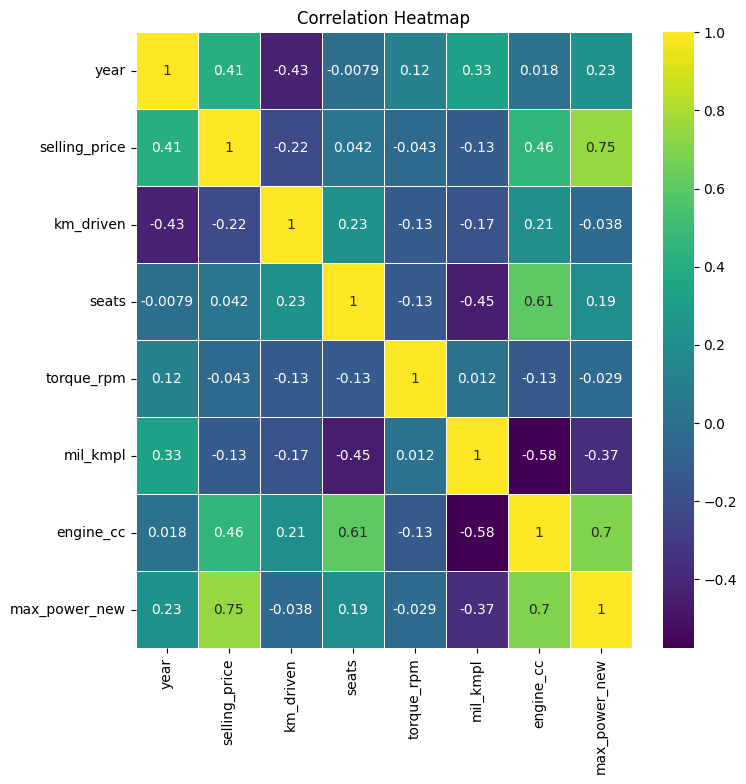

In [17]:
correlation_matrix = Cars_New[['year', 'selling_price', 'km_driven', 'seats', 'torque_rpm', 'mil_kmpl', 'engine_cc', 'max_power_new']].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**This code snippet returns the count of unique values in the "fuel" column of the DataFrame "Cars_New". It provides a breakdown of the number of occurrences for each unique fuel type in the dataset.**

In [18]:
Cars_New["fuel"].value_counts()

,count
fuel,
Diesel,4299
Petrol,3520
CNG,52
LPG,35


**This code snippet returns the count of unique values in the 'seller_type' column of the DataFrame 'Cars_New.**

In [19]:
Cars_New["seller_type"].value_counts()

,count
seller_type,
Individual,6563
Dealer,1107
Trustmark Dealer,236


**Returns the count of unique values in the "transmission" column of the DataFrame "Cars_New", showing the frequency of each transmission type.**

In [20]:
Cars_New["transmission"].value_counts()

,count
transmission,
Manual,6865
Automatic,1041


**Returns the count of unique values in the "owner" column of the DataFrame "Cars_New", indicating the number of cars owned by each category of owners.**

In [21]:
Cars_New["owner"].value_counts()

,count
owner,
First Owner,5215
Second Owner,2016
Third Owner,510
Fourth & Above Owner,160
Test Drive Car,5


**Returns an array of unique values in the "transmission" column of the DataFrame "Cars_New", showing all distinct transmission types present in the dataset.**

In [22]:
Cars_New["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

**This code uses one-hot encoding to convert categorical variable "transmission" into dummy/indicator variables in the DataFrame "Cars_New", creating new binary columns for each unique category of transmission. Then, it displays the first five rows of the updated DataFrame.**

In [23]:
Cars_New = pd.get_dummies(Cars_New, columns=["transmission"])
Cars_New.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,transmission_Automatic,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,First Owner,5.0,2000,23.40,1248.0,74.00,False,True
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Second Owner,5.0,2500,21.14,1498.0,103.52,False,True
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Third Owner,5.0,2700,17.70,1497.0,78.00,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,First Owner,5.0,2750,23.00,1396.0,90.00,False,True
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,First Owner,5.0,4500,16.10,1298.0,88.20,False,True


**This code converts the boolean values in the columns "transmission_Automatic" and "transmission_Manual" of the DataFrame "Cars_New" to integer type (0 for False, 1 for True). Then, it displays the first five rows of the updated DataFrame.**

In [24]:
Cars_New["transmission_Automatic"] = Cars_New["transmission_Automatic"].astype(int)
Cars_New["transmission_Manual"] = Cars_New["transmission_Manual"].astype(int)

Cars_New.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,transmission_Automatic,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,First Owner,5.0,2000,23.40,1248.0,74.00,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Second Owner,5.0,2500,21.14,1498.0,103.52,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Third Owner,5.0,2700,17.70,1497.0,78.00,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,First Owner,5.0,2750,23.00,1396.0,90.00,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,First Owner,5.0,4500,16.10,1298.0,88.20,0,1


**Returns an array of unique values in the "seller_type" column of the DataFrame "Cars_New", showing all distinct seller_type types present in the dataset.**

In [25]:
Cars_New["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

**This code utilizes one-hot encoding to transform the categorical variable "seller_type" into dummy variables in the DataFrame "Cars_New", creating new binary columns for each unique category of seller type. Then, it displays the first five rows of the updated DataFrame.**

In [26]:
Cars_New = pd.get_dummies(Cars_New, columns=["seller_type"])
Cars_New.head(5)

,name,year,selling_price,km_driven,fuel,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,First Owner,5.0,2000,23.40,1248.0,74.00,0,1,False,True,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Second Owner,5.0,2500,21.14,1498.0,103.52,0,1,False,True,False
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Third Owner,5.0,2700,17.70,1497.0,78.00,0,1,False,True,False
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,First Owner,5.0,2750,23.00,1396.0,90.00,0,1,False,True,False
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,First Owner,5.0,4500,16.10,1298.0,88.20,0,1,False,True,False


**This code converts the boolean values in the columns "seller_type_Dealer", "seller_type_Individual", and "seller_type_Trustmark Dealer" of the DataFrame "Cars_New" to integer type (0 for False, 1 for True). Then, it displays the first five rows of the updated DataFrame.**

In [27]:
Cars_New["seller_type_Dealer"] = Cars_New["seller_type_Dealer"].astype(int)
Cars_New["seller_type_Individual"] = Cars_New["seller_type_Individual"].astype(int)
Cars_New["seller_type_Trustmark Dealer"] = Cars_New["seller_type_Trustmark Dealer"].astype(int)

Cars_New.head(5)

,name,year,selling_price,km_driven,fuel,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,First Owner,5.0,2000,23.40,1248.0,74.00,0,1,0,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Second Owner,5.0,2500,21.14,1498.0,103.52,0,1,0,1,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Third Owner,5.0,2700,17.70,1497.0,78.00,0,1,0,1,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,First Owner,5.0,2750,23.00,1396.0,90.00,0,1,0,1,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,First Owner,5.0,4500,16.10,1298.0,88.20,0,1,0,1,0


**Returns an array of unique values in the "owner" column of the DataFrame "Cars_New", showing all distinct owner types present in the dataset.**

In [28]:
Cars_New["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

**This code applies one-hot encoding to the categorical variable "owner" in the DataFrame "Cars_New", creating new binary columns for each unique category of owner. Then, it displays the first five rows of the updated DataFrame.**

In [29]:
Cars_New = pd.get_dummies(Cars_New, columns=["owner"])
Cars_New.head(5)

,name,year,selling_price,km_driven,fuel,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,5.0,2000,23.40,1248.0,74.00,0,1,0,1,0,True,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,5.0,2500,21.14,1498.0,103.52,0,1,0,1,0,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,5.0,2700,17.70,1497.0,78.00,0,1,0,1,0,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,5.0,2750,23.00,1396.0,90.00,0,1,0,1,0,True,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,5.0,4500,16.10,1298.0,88.20,0,1,0,1,0,True,False,False,False,False


**This code converts the boolean values in the columns related to different owner categories into integer type (0 for False, 1 for True) in the DataFrame "Cars_New". Then, it displays the first five rows of the updated DataFrame, showing the encoded owner categories.**

In [30]:
Cars_New["owner_First Owner"] = Cars_New["owner_First Owner"].astype(int)
Cars_New["owner_Fourth & Above Owner"] = Cars_New["owner_Fourth & Above Owner"].astype(int)
Cars_New["owner_Second Owner"] = Cars_New["owner_Second Owner"].astype(int)
Cars_New["owner_Test Drive Car"] = Cars_New["owner_Test Drive Car"].astype(int)
Cars_New["owner_Third Owner"] = Cars_New["owner_Third Owner"].astype(int)

Cars_New.head(5)

,name,year,selling_price,km_driven,fuel,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,5.0,2000,23.40,1248.0,74.00,0,1,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,5.0,2500,21.14,1498.0,103.52,0,1,0,1,0,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,5.0,2700,17.70,1497.0,78.00,0,1,0,1,0,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,5.0,2750,23.00,1396.0,90.00,0,1,0,1,0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,5.0,4500,16.10,1298.0,88.20,0,1,0,1,0,1,0,0,0,0


**Returns an array of unique values in the "fuel" column of the DataFrame "Cars_New", showing all distinct fuel types present in the dataset.**

In [31]:
Cars_New["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

**This code snippet applies one-hot encoding to the "fuel" column in the DataFrame "Cars_New", creating new binary columns for each unique fuel type. Then, it displays the first five rows of the updated DataFrame, showcasing the encoded fuel categories.**

In [32]:
Cars_New = pd.get_dummies(Cars_New, columns=["fuel"])
Cars_New.head(5)

,name,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,transmission_Automatic,...,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,5.0,2000,23.40,1248.0,74.00,0,...,0,1,0,0,0,0,False,True,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,5.0,2500,21.14,1498.0,103.52,0,...,0,0,0,1,0,0,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,5.0,2700,17.70,1497.0,78.00,0,...,0,0,0,0,0,1,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,5.0,2750,23.00,1396.0,90.00,0,...,0,1,0,0,0,0,False,True,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,5.0,4500,16.10,1298.0,88.20,0,...,0,1,0,0,0,0,False,False,False,True


**This code converts the boolean values in the columns related to different fuel categories into integer type (0 for False, 1 for True) in the DataFrame "Cars_New". Then, it displays the first five rows of the updated DataFrame, showing the encoded fuel categories.**

In [33]:
Cars_New["fuel_CNG"] = Cars_New["fuel_CNG"].astype(int)
Cars_New["fuel_Diesel"] = Cars_New["fuel_Diesel"].astype(int)
Cars_New["fuel_LPG"] = Cars_New["fuel_LPG"].astype(int)
Cars_New["fuel_Petrol"] = Cars_New["fuel_Petrol"].astype(int)

Cars_New.head(5)

,name,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,transmission_Automatic,...,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,5.0,2000,23.40,1248.0,74.00,0,...,0,1,0,0,0,0,0,1,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,5.0,2500,21.14,1498.0,103.52,0,...,0,0,0,1,0,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,5.0,2700,17.70,1497.0,78.00,0,...,0,0,0,0,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,5.0,2750,23.00,1396.0,90.00,0,...,0,1,0,0,0,0,0,1,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,5.0,4500,16.10,1298.0,88.20,0,...,0,1,0,0,0,0,0,0,0,1


**This code displays all the columns in the DataFrame "Cars_New".**

In [34]:
Cars_New.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'seats', 'torque_rpm',
       'mil_kmpl', 'engine_cc', 'max_power_new', 'transmission_Automatic',
       'transmission_Manual', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol'],
      dtype='object')

**This code drops the column "name" from the DataFrame "Cars_New".**

In [35]:
Cars_New.drop(columns=["name"], axis=1, inplace=True)

**This code renames the columns in the DataFrame "Cars_New" to make them more concise and readable. Here are the new column names after renaming:**

- **"transmission_Automatic" -> "Automatic"**
- **"transmission_Manual" -> "Manual"**
- **"seller_type_Dealer" -> "Dealer"**
- **"seller_type_Individual" -> "Individual"**
- **"seller_type_Trustmark Dealer" -> "Trustmark Dealer"**
- **"owner_First Owner" -> "First Owner"**
- **"owner_Fourth & Above Owner" -> "Fourth & Above Owner"**
- **"owner_Second Owner" -> "Second Owner"**
- **"owner_Test Drive Car" -> "Test Driver Car"**
- **"owner_Third Owner" -> "Third Owner"**
- **"fuel_CNG" -> "CNG"**
- **"fuel_Diesel" -> "Diesel"**
- **"fuel_LPG" -> "LPG"**
- **"fuel_Petrol" -> "Petrol"**

In [36]:
Cars_New.rename(columns={"transmission_Automatic" : "Automatic"}, inplace=True)

Cars_New.rename(columns={"transmission_Manual" : "Manual"}, inplace=True)

Cars_New.rename(columns={"seller_type_Dealer" : "Dealer"}, inplace=True)

Cars_New.rename(columns={"seller_type_Individual" : "Individual"}, inplace=True)

Cars_New.rename(columns={"seller_type_Trustmark Dealer" : "Trustmark Dealer"}, inplace=True)

Cars_New.rename(columns={"owner_First Owner" : "First Owner"}, inplace=True)

Cars_New.rename(columns={"owner_Fourth & Above Owner" : "Fourth & Above Owner"}, inplace=True)

Cars_New.rename(columns={"owner_Second Owner" : "Second Owner"}, inplace=True)

Cars_New.rename(columns={"owner_Test Drive Car" : "Test Driver Car"}, inplace=True)

Cars_New.rename(columns={"owner_Third Owner" : "Third Owner"}, inplace=True)

Cars_New.rename(columns={"fuel_CNG" : "CNG"}, inplace=True)

Cars_New.rename(columns={"fuel_Diesel" : "Diesel"}, inplace=True)

Cars_New.rename(columns={"fuel_LPG" : "LPG"}, inplace=True)

Cars_New.rename(columns={"fuel_Petrol" : "Petrol"}, inplace=True)

Cars_New.columns

Index(['year', 'selling_price', 'km_driven', 'seats', 'torque_rpm', 'mil_kmpl',
       'engine_cc', 'max_power_new', 'Automatic', 'Manual', 'Dealer',
       'Individual', 'Trustmark Dealer', 'First Owner', 'Fourth & Above Owner',
       'Second Owner', 'Test Driver Car', 'Third Owner', 'CNG', 'Diesel',
       'LPG', 'Petrol'],
      dtype='object')

# **Model Building**

**Importing necessary libraries for Machine Learning.**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

**Sperating the features and the target variable for prediction.**

In [39]:
X = Cars_New[['year', 'km_driven', 'seats', 'torque_rpm', 'mil_kmpl',
       'engine_cc', 'max_power_new', 'Automatic', 'Manual', 'Dealer',
       'Individual', 'Trustmark Dealer', 'First Owner', 'Fourth & Above Owner',
       'Second Owner', 'Test Driver Car', 'Third Owner', 'CNG', 'Diesel',
       'LPG', 'Petrol']]

y = Cars_New["selling_price"]

**This code snippet splits the features ("X") and target ("y") data into training and testing sets, with 80% of the data allocated for training and 20% for testing. It considers the first 3000 samples from the datasets "X" and "y". The resulting splits are assigned to "X_train", "X_test","y_train", and "y_test" variables.**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X[:3000], y[:3000], train_size=0.8)

**1: Initialize a RandomForestRegressor (RFR) model with 300 estimators, a random state of 42, and utilizing all available CPU cores for parallel processing.**

**2: Fit the RandomForestRegressor model to the training data (X_train and y_train), allowing the model to learn patterns in the data.**

**3: Use the trained model to predict the target variable for the test data (X_test), and calculate the accuracy of the model on the training data (X_train, y_train) using the score method. Finally, print the accuracy of the model.**

In [59]:
RFR = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs = -1)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

print("Xtrain, ytrain Result According To RandomForestRegressor: ", round(RFR.score(X_train, y_train) * 100, 2))

print("Xtest, ytest Result According To RandomForestRegressor: ", round(RFR.score(X_test, y_test) * 100, 2))

Xtrain, ytrain Result According To RandomForestRegressor:  99.21
Xtest, ytest Result According To RandomForestRegressor:  91.03


**1: Train a Linear Regression (LR) model using the training data (X_train, y_train) and calculate the coefficient of determination (R-squared) to evaluate the model's performance on the training data.**

**2: Calculate the coefficient of determination (R-squared) for the Linear Regression model on the test data (X_test, y_test) to assess its performance on unseen data.**

In [49]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print("Xtrain, ytrain Result According To LinearRegression: ", round(LR.score(X_train, y_train) * 100, 2))

print("Xtest, ytest Result According To LinearRegression: ", round(LR.score(X_test, y_test) * 100, 2))

Xtrain, ytrain Result According To LinearRegression:  71.08
Xtest, ytest Result According To LinearRegression:  62.75


**1: Train a DecisionTreeRegressor (DTC) model using the training data (X_train, y_train) and compute the coefficient of determination (R-squared) to evaluate the model's performance on the training data.**

**2: Calculate the coefficient of determination (R-squared) for the DecisionTreeRegressor model on the test data (X_test, y_test) to assess its performance on unseen data.**

In [50]:
from sklearn.tree import DecisionTreeRegressor

DTC = DecisionTreeRegressor(max_depth=10, min_samples_split=2)

DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

print("Xtrain, ytrain Result According To DecisionTreeRegressor: ", round(DTC.score(X_train, y_train) * 100, 2))

print("Xtest, ytest Result According To DecisionTreeRegressor: ", round(DTC.score(X_test, y_test) * 100, 2))

Xtrain, ytrain Result According To DecisionTreeRegressor:  99.21
Xtest, ytest Result According To DecisionTreeRegressor:  86.47


**1: Train a RigdeRegression (Rg) model using the training data (X_train, y_train) and compute the accuracy score to evaluate the model's performance on the training data.**

**2: Calculate the accuracy score for the RigdeRegression model on the test data (X_test, y_test) to assess its performance on unseen data.**

In [54]:
from sklearn.linear_model import Ridge

Rg = Ridge(alpha=1.0)

Rg.fit(X_train, y_train)

y_pred = Rg.predict(X_test)

print("Xtrain, ytrain Result According To RigdeRegression: ", round(Rg.score(X_train, y_train) * 100, 2))

print("Xtest, ytest Result According To RigdeRegression: ", round(Rg.score(X_test, y_test) * 100, 2))

Xtrain, ytrain Result According To LogisticRegression:  71.08
Xtest, ytest Result According To LogisticRegression:  62.77


**1: Train a LassoRegression (Ls) model using the training data (X_train, y_train) and compute the accuracy score to evaluate the model's performance on the training data.**

**2: Calculate the accuracy score for the LassoRegression model on the test data (X_test, y_test) to assess its performance on unseen data.**

In [58]:
from sklearn.linear_model import Lasso

Ls = Lasso(alpha=3.0)

Ls.fit(X_train, y_train)

y_pred = Ls.predict(X_test)

print("Xtrain, ytrain Result According To LassoRegression: ", round(Ls.score(X_train, y_train) * 100, 2))

print("Xtest, ytest Result According To LassoRegression: ", round(Ls.score(X_test, y_test) * 100, 2))

Xtrain, ytrain Result According To LassoRegression:  71.08
Xtest, ytest Result According To LassoRegression:  62.75


# **Conclusion:**

*Xtrain, ytrain Result According To RandomForestRegressor:  99.21*

*Xtest, ytest Result According To RandomForestRegressor:  91.03*

*Xtrain, ytrain Result According To LinearRegression:  71.08*

*Xtest, ytest Result According To LinearRegression:  62.75*

*Xtrain, ytrain Result According To DecisionTreeRegressor:  99.21*

*Xtest, ytest Result According To DecisionTreeRegressor:  86.47*

*Xtrain, ytrain Result According To LogisticRegression:  71.08*

*Xtest, ytest Result According To LogisticRegression:  62.77*

*Xtrain, ytrain Result According To LassoRegression:  71.08*

*Xtest, ytest Result According To LassoRegression:  62.75*


**After testing and comparing multiple regression models, we can conclude that the Random Forest Regressor achieved the highest performance with 99.21% training accuracy and 91.03% testing accuracy. This demonstrates its superior ability to capture complex, non-linear relationships in the data while maintaining strong generalization to unseen samples.**

# **Save Model**

**This code snippet saves the trained RandomForestRegressor model ("RFR") to a file named "Finalized-Model.pickle" using Python's pickle module. The model is serialized and stored in binary format for future use or deployment.**

In [60]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(RFR, file)